# Occupations - Data Visualization

In [36]:
!pip install nltk pandas scikit-learn matplotlib seaborn wordcloud

import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')

data_URL = 'https://raw.githubusercontent.com/Ariamestra/Occupations/main/Occupations/occupations.csv'

df = pd.read_csv(data_URL)
print(f"Shape: {df.shape}")
df.head()



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
Shape: (1016, 3)


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Code,Occupation,Job Family
0,13-2011.00,Accountants and Auditors,Business and Financial Operations
1,27-2011.00,Actors,"Arts, Design, Entertainment, Sports, and Media"
2,15-2011.00,Actuaries,Computer and Mathematical
3,29-1291.00,Acupuncturists,Healthcare Practitioners and Technical
4,29-1141.01,Acute Care Nurses,Healthcare Practitioners and Technical


### Print the column names

In [37]:
print(f"Columns: {df.columns}")

Columns: Index(['Code', 'Occupation', 'Job Family'], dtype='object')


### Get summary of the DataFrame

In [38]:
print(f"Info: {df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Code        1016 non-null   object
 1   Occupation  1016 non-null   object
 2   Job Family  1016 non-null   object
dtypes: object(3)
memory usage: 23.9+ KB
Info: None


### Check for the number of missing values in each column

In [39]:
print("Find all of the nulls:")
print(df.isnull().sum())

Find all of the nulls:
Code          0
Occupation    0
Job Family    0
dtype: int64


### Get the statistical summary of occupations and job families

In [40]:
print("Describe the occupations:")
print(df['Occupation'].describe())
print('-' * 50)
print("Describe the job family:")
print(df['Job Family'].describe())

Describe the occupations:
count                         1016
unique                        1016
top       Accountants and Auditors
freq                             1
Name: Occupation, dtype: object
--------------------------------------------------
Describe the job family:
count           1016
unique            23
top       Production
freq             114
Name: Job Family, dtype: object


### Top 20 Occupations

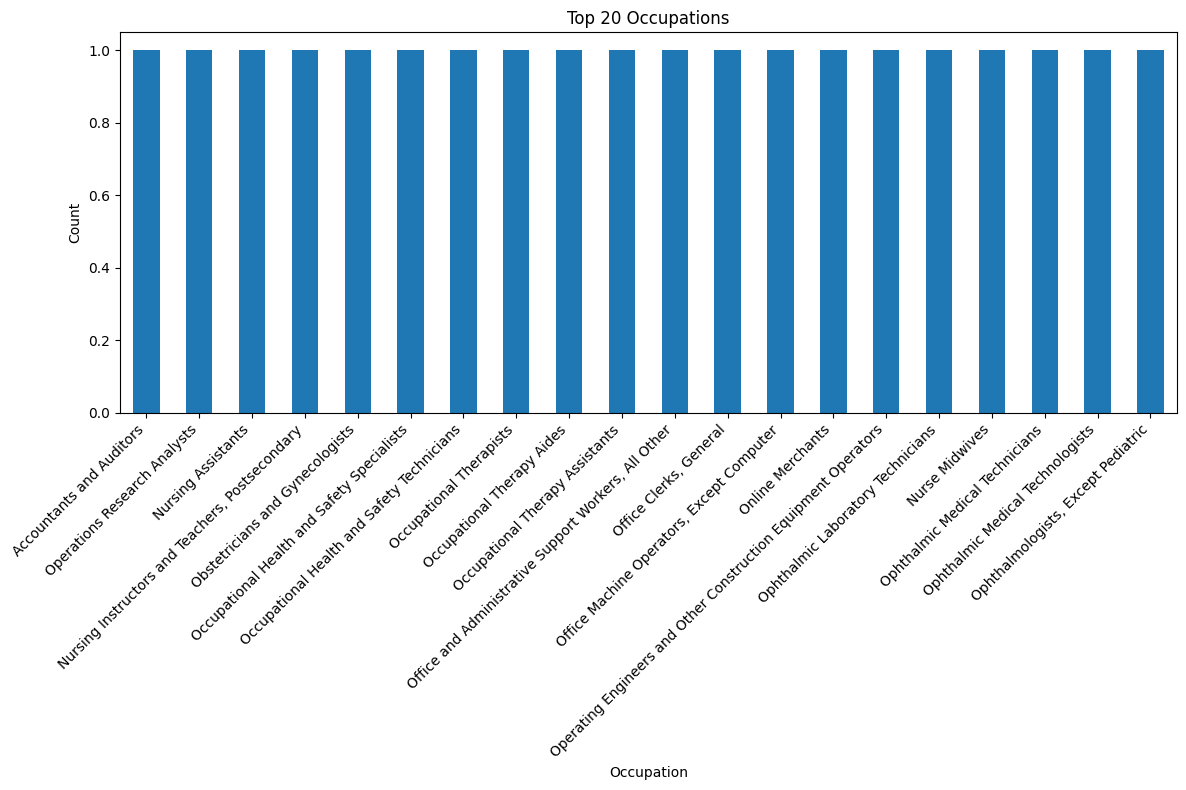

In [41]:
occupation_counts = df['Occupation'].value_counts()

# Show only the top 20 
top_n = 20
top_occupations = occupation_counts.nlargest(top_n)

plt.figure(figsize=(12, 8))
top_occupations.plot(kind='bar')
plt.title('Top 20 Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  

plt.show()

### Job family distribution 

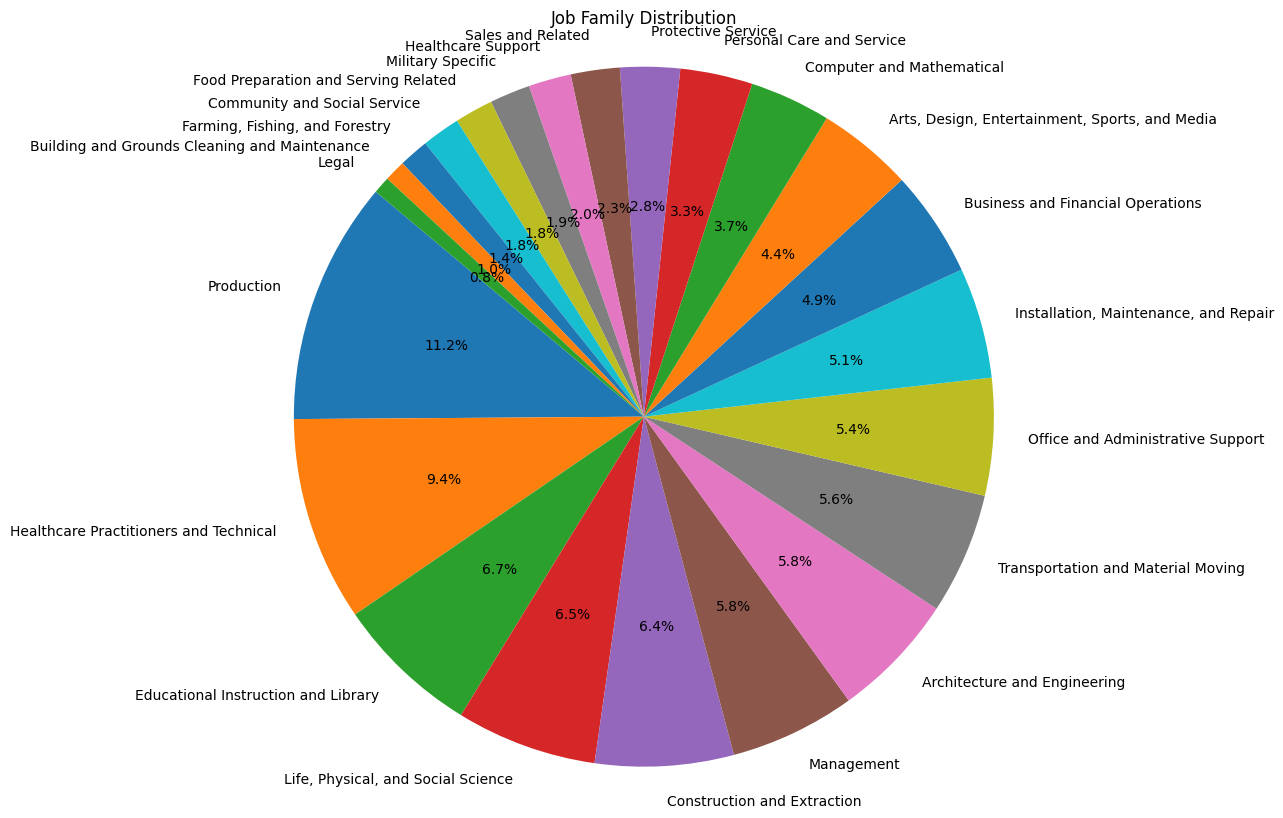

In [42]:
job_family_counts = df['Job Family'].value_counts()

plt.figure(figsize=(12, 10))
plt.pie(job_family_counts, labels=job_family_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Job Family Distribution')
plt.axis('equal')  

plt.show()

# classification

In [43]:
X = df['Occupation']
y = df['Job Family']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train_tfidf, y_train)

y_pred = clf.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5637254901960784
                                                precision    recall  f1-score   support

                  Architecture and Engineering       0.87      0.81      0.84        16
Arts, Design, Entertainment, Sports, and Media       0.28      0.62      0.38         8
 Building and Grounds Cleaning and Maintenance       0.00      0.00      0.00         2
             Business and Financial Operations       0.22      0.22      0.22         9
                  Community and Social Service       0.50      0.20      0.29         5
                     Computer and Mathematical       1.00      0.25      0.40         8
                   Construction and Extraction       0.62      0.33      0.43        15
           Educational Instruction and Library       0.87      0.81      0.84        16
                Farming, Fishing, and Forestry       0.00      0.00      0.00         2
          Food Preparation and Serving Related       1.00      0.50      0.67         4
  

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Plot classification 

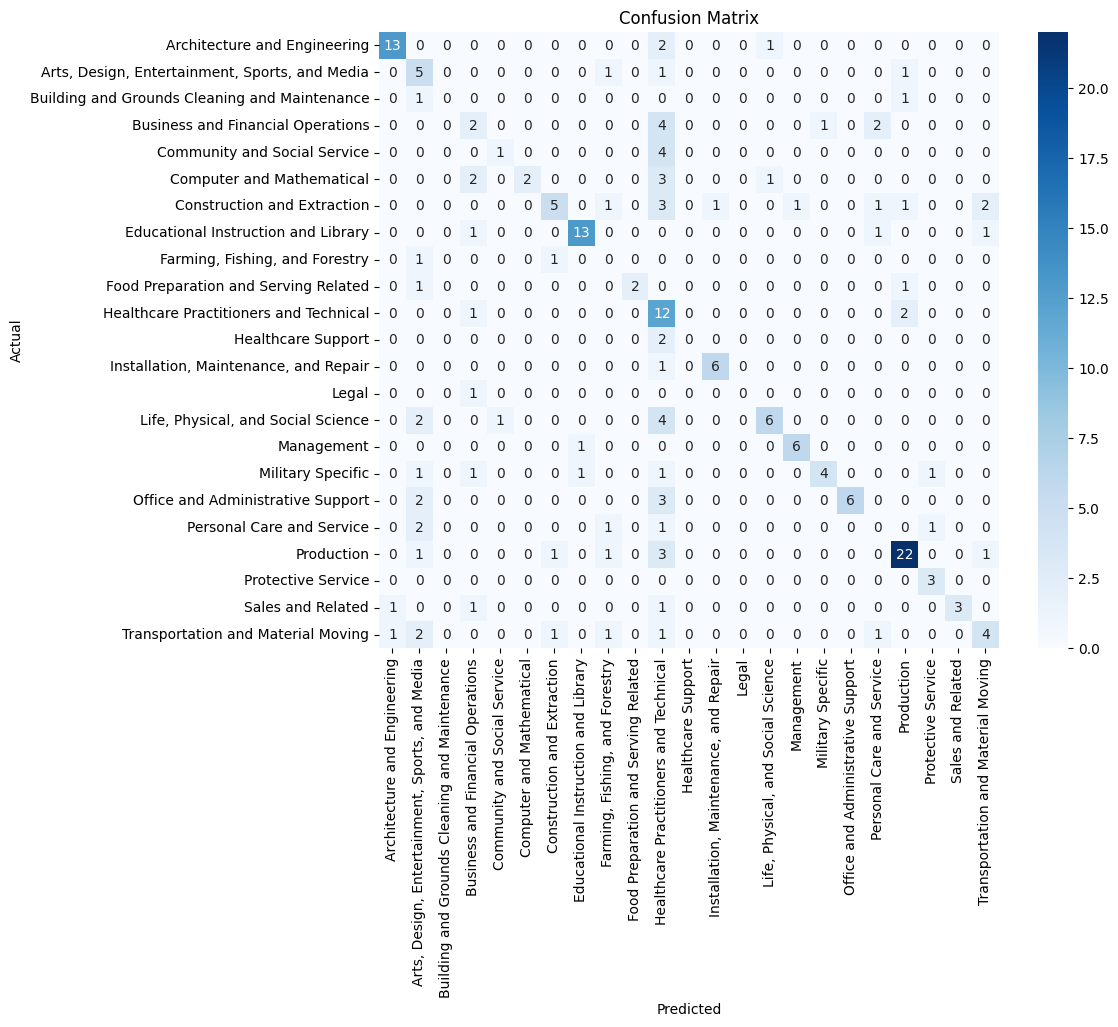

In [44]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Job Family Clustering
Group occupations into clusters based on their similarities, which may reveal new job families or subcategories.

Steps:

Feature Extraction: Extract features from the occupation names using text vectorization techniques.
Clustering Algorithm: Apply clustering algorithms such as K-Means.
Evaluation: Evaluate the clusters using silhouette score or other clustering validation metrics.
Visualization: Visualize the clusters to gain insights into the grouping of occupations.

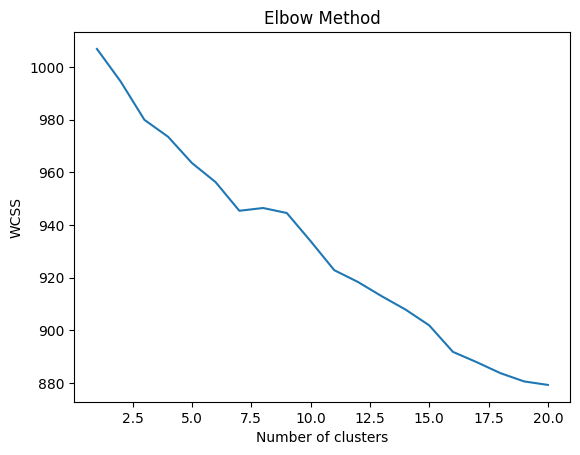

Cluster 0:
['accountants auditors' 'actors' 'actuaries' 'acupuncturists'
 'acute care nurses' 'adhesive bonding machine operators tenders'
 'administrative law judges adjudicators hearing officers'
 'advanced practice psychiatric nurses' 'agricultural inspectors'
 'agricultural workers' 'air crew members' 'air crew officers'
 'air traffic controllers' 'aircraft cargo handling supervisors'
 'aircraft launch recovery officers' 'aircraft service attendants'
 'aircraft structure surfaces rigging systems assemblers'
 'allergists immunologists' 'amusement recreation attendants'
 'anesthesiologist assistants' 'anesthesiologists' 'animal breeders'
 'animal caretakers' 'animal control workers' 'animal scientists'
 'animal trainers' 'anthropologists archeologists'
 'appraisers assessors real estate'
 'appraisers personal business property'
 'arbitrators mediators conciliators' 'architects except landscape naval'
 'architectural civil drafters' 'archivists'
 'armored assault vehicle crew members'

In [45]:
# Preprocess job titles
stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = text.lower()  # Lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  
    words = word_tokenize(text)  # Tokenize
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

df['Occupation'] = df['Occupation'].apply(preprocess)

# Vectorize job titles
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Occupation'])

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 21), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

optimal_clusters = 10  

# KMeans clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


for i in range(optimal_clusters):
    print(f"Cluster {i}:")
    print(df[df['Cluster'] == i]['Occupation'].values)
    print()

df.to_csv('clustered_job_families.csv', index=False)